# Granger Causality Analysis between Twitter Sentiment, Reddit Sentiment, Google Trends and Bitcoin Prices

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [42]:
def plot_bitcoin_price(data,col,bitcoin,name):
  '''
  Plots the time series "data" and the corresponding bitcoin prices for that day
  Input:
    data: the dataframe to be plotted
    col: the column name of the data to be plotted
    bitcoin: dataframe with bitcoin price
    name: Label for the figure
  '''
  fig,ax = plt.subplots(figsize=(10, 8), dpi=80)
  # make a plot
  ax.plot(bitcoin['Date'], bitcoin['open'], color="palevioletred")
  # set x-axis label
  ax.set_xlabel("Date",fontsize=14)
  # set y-axis label
  ax.set_ylabel("Bitcoin Price",color="palevioletred",fontsize=14)

  # twin object for two different y-axis on the sample plot
  ax2=ax.twinx()
  # make a plot with different y-axis using second axis object
  ax2.plot(data['date'], data[col],color="cadetblue")
  ax2.set_ylabel(name,color="cadetblue",fontsize=14)
  ax.set_xticklabels([])
  plt.show()

In [43]:
def plot_bitcoin_diff(data,col,bitcoin,name):
  '''
  Plots the time series "data" and the corresponding bitcoin price difference for that day
  Input:
    data: the dataframe to be plotted
    col: the column name of the data to be plotted
    bitcoin: dataframe with bitcoin price difference
    name: Label for the figure
  '''
  fig,ax = plt.subplots(figsize=(10, 8), dpi=80)
  # make a plot
  ax.plot(bitcoin['Date'], bitcoin['Diff_Open'], color="palevioletred")
  # set x-axis label
  ax.set_xlabel("Date",fontsize=14)
  # set y-axis label
  ax.set_ylabel("Bitcoin Price Difference",color="palevioletred",fontsize=14)

  # twin object for two different y-axis on the sample plot
  ax2=ax.twinx()
  # make a plot with different y-axis using second axis object
  ax2.plot(data['date'], data[col],color="cadetblue")
  ax2.set_ylabel(name,color="cadetblue",fontsize=14)
  ax.set_xticklabels([])
  plt.show()  

In [47]:
#Reference: https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2
maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):   
  '''
  Performs Granger Causation Analysis, to get the causation matrix
  Inputs:
        data: a dataframe consisting of the STATIONARY timeseries that we want to analyse
        variable: names of columns from "data" that we are performing the causality analysis on 
  Outputs: a causation matrix
          The row are the response (y) and the columns are the predictors (x). 
          If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that column_x Granger causes column_y.
  ''' 
   
  df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in df.columns:
    for r in df.index:
      test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      df.loc[r, c] = min_p_value
  df.columns = [var + '_x' for var in variables]
  df.index = [var + '_y' for var in variables]
  return df

In [48]:
#Reference: https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
def check_stationary(timeseries):
  '''
  Checks if a timeseries is stationary or not-- Granger Causality CAN ONLY be performed on stationary timeseries
  '''
  result = adfuller(timeseries)
  print(f'Test Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'critical_values: {result[4]}')

  if result[1] > 0.05:
    print("Series is not stationary")
  else:
    print("Series is stationary")

## Google Trends -- Average Scoring

In [49]:
bitcoin = pd.read_csv('categorical_bitcoin_price.csv', sep='\t', index_col=0)
google =pd.read_csv('trends_daily_score.csv', sep='\t', index_col=0)

In [50]:
bitcoin.head()

,Date,open,high,low,close,volume,Diff_Open,Diff_Category
0,2021-01-01,28923.63,29600.00,28624.57,29331.69,54182.925011,NaN,0
1,2021-01-02,29331.70,33300.00,28946.53,32178.33,129993.873362,408.07,0
2,2021-01-03,32176.45,34778.11,31962.99,33000.05,120957.566750,2844.75,1
3,2021-01-04,33000.05,33600.00,28130.00,31988.71,140899.885690,823.60,1
4,2021-01-05,31989.75,34360.00,29900.00,33949.53,116049.997038,-1010.30,-1


In [51]:
google.head()

,date,avg_score,weighted_score
0,2021-01-01,12.660625,14.447561
1,2021-01-02,34.144375,37.360744
2,2021-01-03,48.853125,53.128124
3,2021-01-04,32.544375,35.352064
4,2021-01-05,24.341250,26.472194


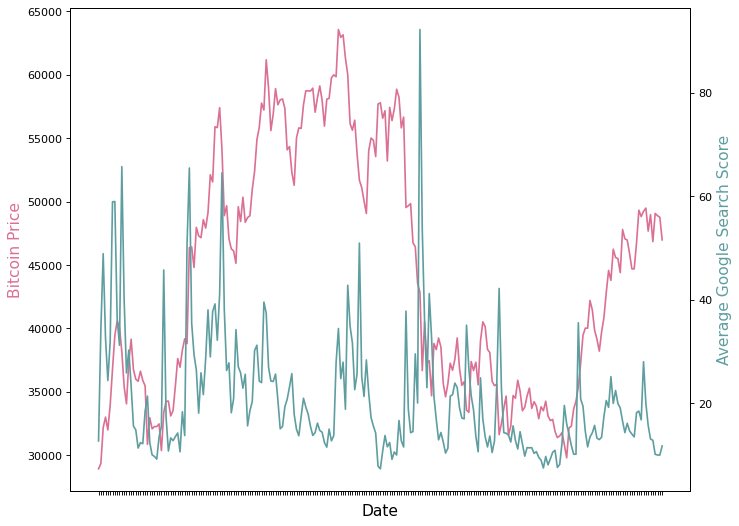

In [53]:
plot_bitcoin_price(google,'avg_score', bitcoin, name="Average Google Search Score")

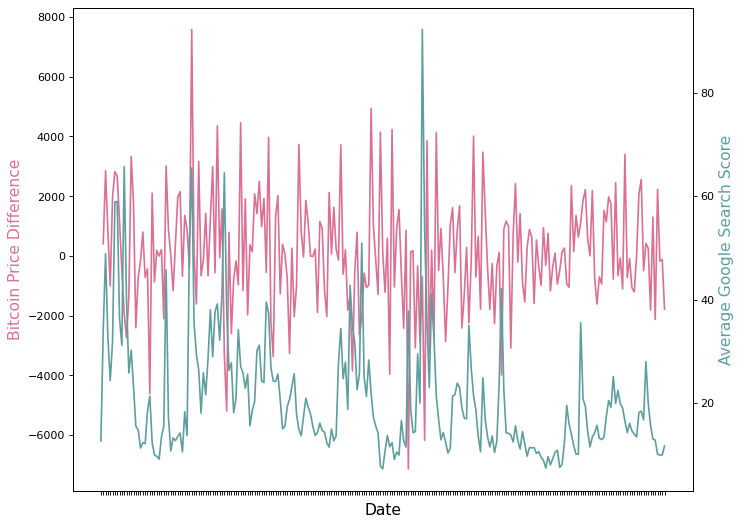

In [54]:
plot_bitcoin_diff(google,'avg_score', bitcoin, name="Average Google Search Score")

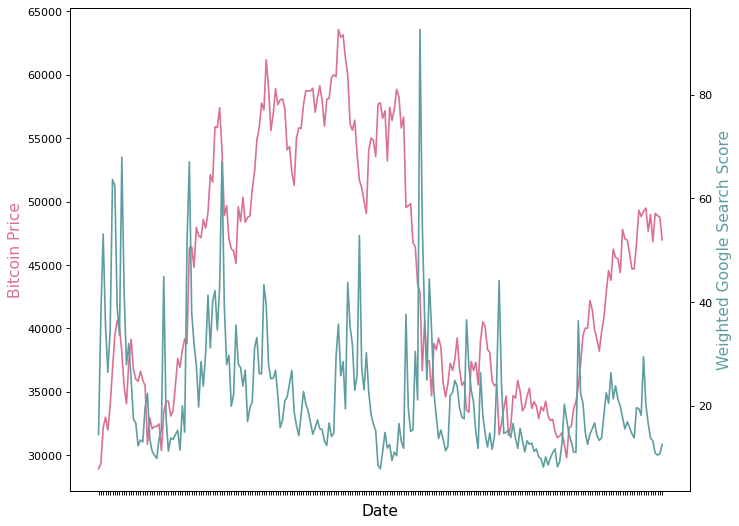

In [55]:
plot_bitcoin_price(google,'weighted_score', bitcoin, name="Weighted Google Search Score")

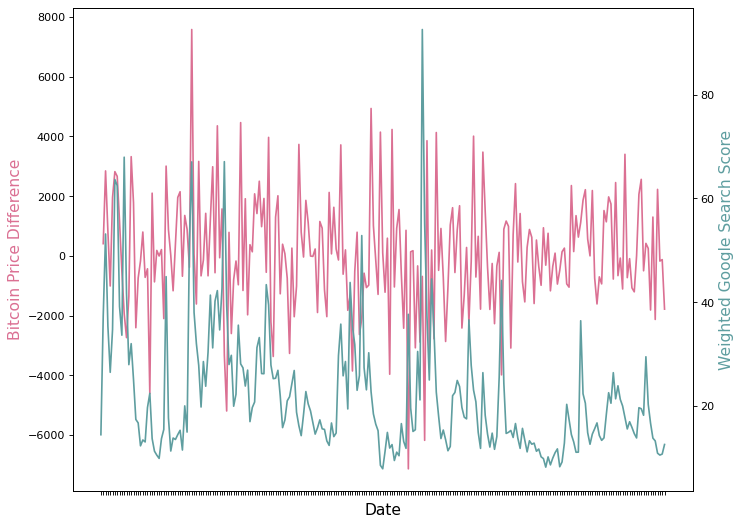

In [56]:
plot_bitcoin_diff(google,'weighted_score', bitcoin, name="Weighted Google Search Score")

Granger Causality is only carried out on stationary time series. Finding th difference will make it stationary

Reference: https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/

In [32]:
check_stationary(google['avg_score'])

Test Statistics: -7.63547623573123
p-value: 1.9576675387808164e-11
critical_values: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}
Series is stationary


In [41]:
check_stationary(google['weighted_score'])

Test Statistics: -7.435194689457
p-value: 6.209898339028594e-11
critical_values: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}
Series is stationary


In [33]:
check_stationary(bitcoin['open'])

Test Statistics: -1.825793411804055
p-value: 0.3677332429247039
critical_values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}
Series is not stationary


In [37]:
check_stationary(bitcoin['Diff_Open'].dropna())

Test Statistics: -10.554298525888205
p-value: 8.026227643475927e-19
critical_values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}
Series is stationary


Performing Granger Analysis

In [60]:
granger_df = pd.DataFrame()
#We need difference in bitcoin price (granger causality can only be calculated on stationary data)
granger_df['Bitcoin_Diff_Open'] = bitcoin['Diff_Open']
granger_df['Google_Search_Avg'] = google['avg_score']
granger_df['Google_Search_Weighted'] = google['weighted_score']
#drop NAN columns
granger_df = granger_df.dropna()
granger_df.head()

,Bitcoin_Diff_Open,Google_Search_Avg,Google_Search_Weighted
1,408.07,34.144375,37.360744
2,2844.75,48.853125,53.128124
3,823.60,32.544375,35.352064
4,-1010.30,24.341250,26.472194
5,1959.78,31.816250,34.715996


In [61]:
# Granger Causality between the bitcoin prices and google search trends
grangers_causation_matrix(granger_df, variables = granger_df.columns)

,Bitcoin_Diff_Open_x,Google_Search_Avg_x,Google_Search_Weighted_x
Bitcoin_Diff_Open_y,1.0000,0.0420,0.0502
Google_Search_Avg_y,0.0429,1.0000,0.0136
Google_Search_Weighted_y,0.0423,0.0159,1.0000


The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that metric_x Granger causes metric_y. 

**We can hence conclude that Average Google Search Trends granger causes Bitcoin Prices, while using the weighted google search score does not granger cause bitcoin price changes**

Thus, in all further analysis, we use the Average Google Search Score Metric
